<div><img src = "http://china-bigdatauniversity.oss-cn-qingdao.aliyuncs.com/dolphin-labs/notebook-header-logo.png", width = 230/></div>

<h1 align=center><font size = 5>模块二：机器学习之逻辑回归</font></h1> 

<h2 align=center><font size = 2>【课程性质：基础实验】</font></h2> 

<p><b>机器学习(Machine Learning, ML)是人工智能(AI)的一个子集，是使计算机具有智能的根本途径。</b></p>
在本实验中，您将学习Logisitic回归模型的基本思想以及如何用Python实现。 

# 目录
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font size = 3><p><a href="#ref1"><strong>1 理论学习部分</strong></a></p></font>
    <br>
    <font size = 3><p><a href="#ref2"><strong>2 实践操作部分</strong></a></p></font>
        <p>2.1 导入包</p>
        <p>2.2 数据处理</p>
        <p>2.3 拟合预测</p>
        <p>2.4 调参</p>
    <br>    
    <font size = 3><p><a href="#ref3"><strong>3 练习</strong></a></p></font>
</div>


---

<div class="alert alert-block alert-info" style="margin-top: 10px">
<a id="ref1"></a>
<center>1 理论学习部分</center>
</div>

逻辑回归(Logistic Regression)是一种预测分析，解释因变量与一个或者多个自变量之间的关系，与线性回归不同之处就是它的目标变量有几种类别，所以逻辑回归主要用于解决分类问题。
线性回归适用于估计连续值（例如估算房价），但它不是预测观测数据点类别的最佳工具。为了估计分类，我们需要一些关于该数据点最可能的类别的指导。为此，我们使用Logistic回归。
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>回想一下线性回归：</strong></font>
<br>
<br>
线性回归找到一个函数，它将连续因变量$y$与某些预测变量（自变量$x_1, x_2$等）相关联。简单的线性回归假设了以下形式的函数： 
<br><br>
$$
y = \omega_0 + \omega_1 * x_1 + \omega_2 * x_2 +...
$$
<br>
并找到$\omega_0, \omega_1, \omega_2$等的值。术语$\omega_0$是“截距”或“常数项”（在下式中显示为$b$）： 
<br><br>
$$
\vec{y}=\vec{\omega}·\vec{x}+b
$$
<p></p>

</div>

Logistic回归是线性回归的变体，当观察到的因变量_y_是分类时是有用的。它产生一个预测类标签作为自变量函数的概率的公式。

尽管名称 logistic _回归_ ，它实际上是一个概率分类模型。 logistic回归通过采用线性回归拟合特殊的S形曲线，并使用以下函数将数值估计转换为概率：

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1+e^y} = exp(y) / (1+exp(y)) = p 
$$

它产生0（如y接近负无穷）和1（随着y接近正无穷）之间的p值。这现在成为一种特殊的非线性回归.

在这个等式中，_y_ 是回归结果（由系数加权的变量之和），$exp$是指数函数以及$\theta(y)$是 logistic 函数，也称为logistic曲线。这是一种常见的“S”形（S形曲线），最初是为模拟人口增长而开发的。

在另一个配置中，您可能也会看到过此函数：

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-x}}
$$

因此，简而言之，Logistic回归通过logistic/sigmoid 传递输入，但将结果视为概率：

<div><img src="http://d-labs.oss-cn-shanghai.aliyuncs.com/meta-data/mod_ID_24_final.png", width = "400", align = "center"></div>


-------------------------------

<div class="alert alert-block alert-info" style="margin-top: 10px">
<a id="ref2"></a>
<center>2 实践操作部分</center>
</div>

### 2.1 导入包

In [ ]:
!pip install sklearn --upgrade -i http://mirrors.aliyun.com/pypi/simple --trusted-host mirrors.aliyun.com

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
# 请输入代码：
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 数据处理
我们将加载我们要使用的数据集。在这种情况下，我们正在使用 <b>iris</b>内置的数据集 --- 所以不需要做任何预处理，我们可以直接操纵它。我们将数据集分为X和y，然后分解为训练集_trainX_和_trainY_，随机测试集_testX_和_testY_。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.25, random_state=0, stratify=iris_y)
```

In [2]:
# 请输入代码：
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.25, random_state=0, stratify=iris_y)

### 2.3 拟合预测
<p>函数LogisticRegression()的属性和方法介绍：</p>
<ul>
    属性：
    <ul>
       <li>coef_：权重向量</li>
       <li>intercept：$b$ 值</li>
       <li>n_iter_：实际迭代次数</li></ul>
    方法：
    <ul>
       <li>fit(X, y[,sample_weight])：训练模型</li>
       <li>predict(X)：用模型进行预测，返回预测值</li>
       <li>predict_proba(X)：返回一个数组，数组元素依次是X预测为各个类别的概率</li>
       <li>score(X, y[,sample_weight])：返回在(X, y)上的预测的准确率</li></ul>
</ul>

现在创建一个名为regr的LogisticRegression实例

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
regr = LogisticRegression(max_iter = 2000)
```

In [3]:
# 请输入代码：
regr = LogisticRegression(max_iter = 2000)

利用regr模型训练trainX和trainY

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
regr.fit(trainX, trainY)
```

In [4]:
# 请输入代码：
regr.fit(trainX, trainY)

LogisticRegression(max_iter=2000)

回归评价

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
print('Coefficients:%s, intercept %s' % (regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr.score(testX, testY))
```

In [5]:
# 请输入代码：
print('Coefficients:%s, intercept %s' % (regr.coef_,regr.intercept_))
print("Residual sum of squares: %.2f"% np.mean((regr.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr.score(testX, testY))

Coefficients:[[-0.38340846  0.86187824 -2.27003634 -0.9744431 ]
 [ 0.34360292 -0.37876116 -0.03099424 -0.86880637]
 [ 0.03980554 -0.48311708  2.30103059  1.84324947]], intercept [  8.75830949   2.49431233 -11.25262182]
Residual sum of squares: 0.00
Score: 1.00


### 2.4 调参
<p>首先我们考察LogisticRegression()的multi_class参数对分类结果的影响。默认采用的是one-ve-rest策略，但是逻辑回归模型原生就支持多类分类，即multi_class='multinomial'</p>
<p><b>注意：</b>只有LogisticRegression()的solver参数为'newton-cg'或者'lbfgs’才能配合multi_class='multinomial'，否则报错</p>

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
regr1 = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=2000)
regr1.fit(trainX,trainY)
print('Coefficients:%s, intercept %s' % (regr1.coef_,regr1.intercept_))
print("Residual sum of squares: %.2f" % np.mean((regr1.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr1.score(testX, testY))
```

In [6]:
# 请输入代码：
regr1 = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=2000)
regr1.fit(trainX,trainY)
print('Coefficients:%s, intercept %s' % (regr1.coef_,regr1.intercept_))
print("Residual sum of squares: %.2f" % np.mean((regr1.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr1.score(testX, testY))

Coefficients:[[-0.38340846  0.86187824 -2.27003634 -0.9744431 ]
 [ 0.34360292 -0.37876116 -0.03099424 -0.86880637]
 [ 0.03980554 -0.48311708  2.30103059  1.84324947]], intercept [  8.75830949   2.49431233 -11.25262182]
Residual sum of squares: 0.00
Score: 1.00


可以看到在这个问题中，多分类策略进一步提升了预测准确率，提升到100%，说明对于测试集的数据，LogisticRegression分类器预测完全正确。

接下来，我们考察LogisticRegression()的参数C对分类模型的预测性能的影响。C是正则化项系数的倒数，它越小则正则化项的权重越大。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
Cs = np.logspace(-2,4,num=100)
scores = []
for C in Cs:
    regr2 = LogisticRegression(C=C)
    regr2.fit(trainX,trainY)
    scores.append(regr2.score(testX,testY))
print(scores)
```

In [9]:
# 请输入代码：
Cs = np.logspace(-2,4,num=100)
scores = []
for C in Cs:
    regr2 = LogisticRegression(C=C)
    regr2.fit(trainX,trainY)
    scores.append(regr2.score(testX,testY))
print(scores)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

[0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.8421052631578947, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

scores数据太多,不利于分析，所以我们可以借助绘图进行分析

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Cs,scores)
ax.set_xlabel(r'C')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('LogisticRegression')
plt.show()
```

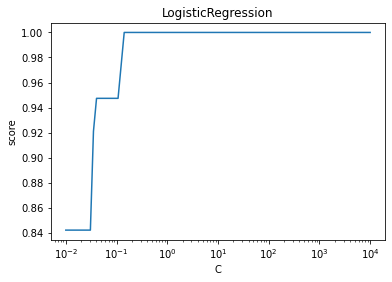

In [10]:
# 请输入代码：
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Cs,scores)
ax.set_xlabel(r'C')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('LogisticRegression')
plt.show()

从图中可以看出，随着C的增大（即正则化项减少），LogisticRegression的预测准确率上升；当C增大到一定程度，LogisticRegression的预测准确率维持在较高的水准上保持不变。

---

<div class="alert alert-block alert-info" style="margin-top: 10px">
<a id="ref3"></a>    
<center>3 练习</center>
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> 练习 :</h3>

<b>对本次实验中LogisticRegression()的参数默认_penalty='l2'_进行修改，修改为_penalty='l1'_，看看运行结果有什么不同？</b>

In [16]:
#请输入代码
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.25, random_state=0, stratify=iris_y)
regr3 = LogisticRegression(penalty='l1',solver='liblinear')
regr3.fit(trainX, trainY)
print('Coefficients:%s, intercept %s' % (regr3.coef_,regr3.intercept_))
print("Residual sum of squares: %.2f" % np.mean((regr3.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr3.score(testX, testY))

Coefficients:[[ 0.          2.33019751 -2.63418329  0.        ]
 [ 0.         -1.49538323  0.74281689 -1.41027717]
 [-2.29826093 -1.97145497  2.63396643  4.30774064]], intercept [0.         2.56032772 0.        ]
Residual sum of squares: 0.03
Score: 0.97


<div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
代码：
    
```python
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.25, random_state=0, stratify=iris_y)
regr3 = LogisticRegression(penalty='l1')
regr3.fit(trainX, trainY)
print('Coefficients:%s, intercept %s' % (regr3.coef_,regr3.intercept_))
print("Residual sum of squares: %.2f" % np.mean((regr3.predict(testX) - testY) ** 2))
print('Score: %.2f' % regr3.score(testX, testY))

```
答案：
<p>Coefficients:[[ 0.          2.33169161 -2.6360754   0.        ]
 [ 0.         -1.49623282  0.74141613 -1.40707677]
 [-2.29770406 -1.97158701  2.63309728  4.30844852]]</p>
<p>intercept [0.        2.5643593 0.       ]</p>
<p>Residual sum of squares: 0.03</p>
<p>Score: 0.97</p>
</div>



### 感谢您完成本次实验！

这是**逻辑回归**实验的结尾。希望现在您对Logistic回归及其结构和流程的工作有了更深入的了解。感谢您阅读本次实验，祝您学习愉快。

# 实验总结

在本次实验中，通过对设置参数`l1`和`l2`的对比，我们发现对于此问题`l2`比`l1`更好。虽然`l1`在多次迭代后得到的效果与趋近于1，但是其收敛速度不及`l2`且在接近稳定时达到局部迭代收敛下降的情况。通过本次实验，发现Logistic回归模型较线性回归在拟合非线性问题上更高效，但是在测试过程中参数的选择对模型的效果与性能还是会有较大影响，所以要多次实验测试选择合适的参数。

**Debug** 关于`regr3 = LogisticRegression(penalty='l1')`报错 这是由于sklearn的版本问题 通过增加传入参数`solver='liblinear'`得以解决。

<hr>

Copyright &copy; 2017 - 2020 [海豚大数据实验室](http://www.dolphin-labs.com)